$\textbf{1. Consider two signals x and y, where x is a cosine function and y is a sine function.}$ Both signals are of duration 2 s and of f 10 Hz. Notice, in this case, the data consist of single trials.

I. Simulate both signals (each with a sampling interval of 0.001 s) and compute their cross correlation. What do you find, and how do you interpret the results?

II. Imagine that the signal x was collected from the scalp EEG of a human subject two years ago, while signal y was collected from a voltage recording made in rat hippocampus yesterday. Would you expect these two signals - collected from very diverse preparations - to be related? How does this knowledge impact your interpretation of the cross correlation result?

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [54]:
d = 2 #duration of signals in seconds
f = 10 #f in Hz
dt = 0.001 # sampling interval in seconds
n = int(d/dt)
t = np.arange(0, n)*dt #time vector

In [55]:
x = np.cos(2 * np.pi * f * t) #cosine signal
y = np.sin(2 * np.pi * f * t) #sine signal

xy = np.correlate(x,y,'full')
lags = np.arange(-n + 1, n)

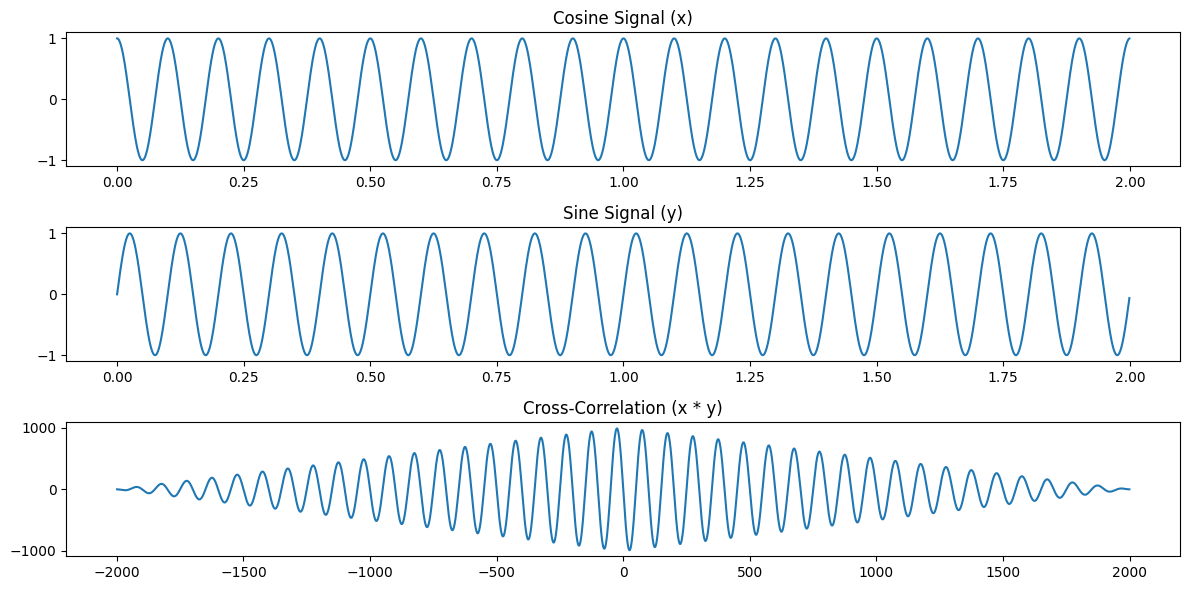

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Cosine Signal (x)')

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Sine Signal (y)')

plt.subplot(3, 1, 3)
plt.plot(lags, xy)
plt.title('Cross-Correlation (x * y)')

plt.tight_layout()
plt.show()

INTERPERT THE RESULTS HERE

Imagining that the sine data was collected from an EEG study on a human 2 years ago while the sine data was collected from a mouse recently, I would not expect these signals to be related. 

$\textbf{2. Generate synthetic data consisting of a sinusoid oscillating at f f plus additive Gaussian noise.}$ More specifically, generate 100 trials of 1 s data sampled at 500 Hz. For each trial, set the initial phase of the sinusoid to a random value between 0 and 2 $\pi$. Repeat this procedure to create a second dataset, but in this case fix the initial phase of the sinusoid to $\pi$.

In [90]:
n_trials = 100
d = 1 #DURATION
dt = 500 #hz sampling rate

#gaussian
f = 10 #f
amp = 1
noise_stdev = 0.1 #st dev of guassian noise 

n_samples = int(d * dt)
data = []

In [91]:
#first data set
for _ in range(n_trials):
    initial_phase = 2 * np.pi * np.random.rand()  # Random initial phase [0, 2*pi]
    t = np.linspace(0, d, n_samples, endpoint=False)
    signal = amp * np.sin(2 * np.pi * f * t + initial_phase)
    noise = np.random.normal(0, noise_stdev, len(t))  # Gaussian noise
    trial_data = signal + noise
    data.append(trial_data)


In [92]:

# Create a second dataset with a fixed initial phase of pi
fixed_phase = np.pi
fixed_data = []
for _ in range(n_trials):
    t = np.linspace(0, d, n_samples, endpoint=False)
    signal = amp * np.sin(2 * np.pi * f * t + fixed_phase)
    noise = np.random.normal(0, noise_stdev, len(t))
    trial_data = signal + noise
    fixed_data.append(trial_data)

i. Visualize the data from each electrode. What rhythms do you observe?

ii. Plot the trial-averaged spectrum versus frequency for each electrode. Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

iii. Plot the trial-averaged cross correlation between the two datasets. What features do you observe?

iv. Plot the coherence between the two datasets. At what rhythms, if any, is the coherence large?

v. Summarize (in a few sentences) the results of your data analysis. What are the important features of these data you would communicate to a colleague?

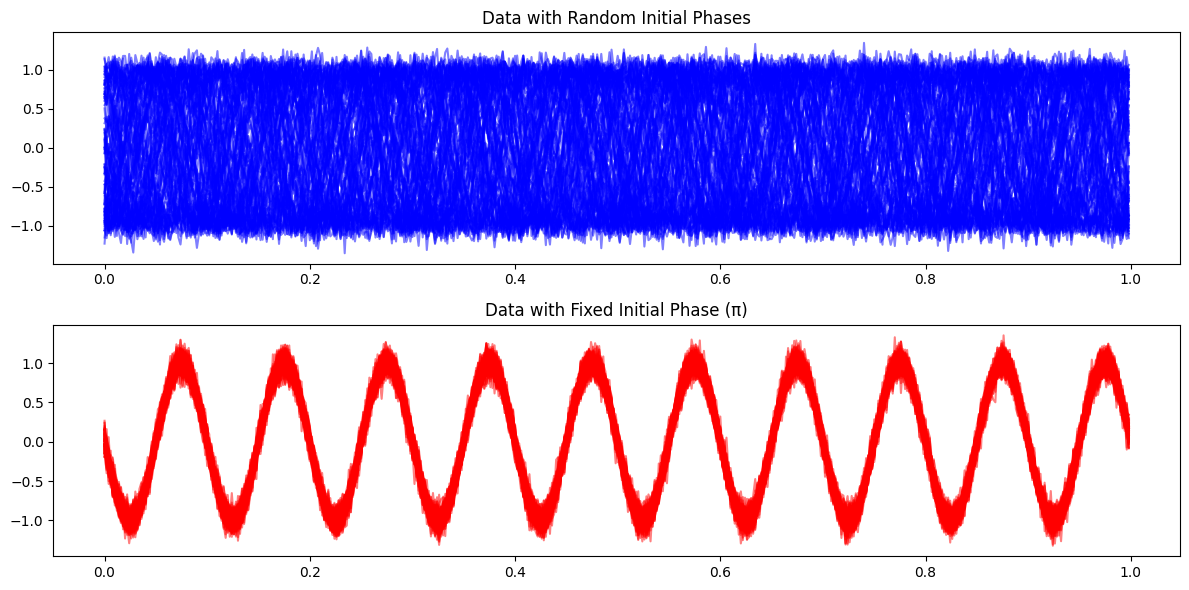

In [93]:
#plot first data set 
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Data with Random Initial Phases")
for trial_data in data:
    plt.plot(t, trial_data, alpha=0.5, color='b')  # Use alpha to make lines semi-transparent

# Plot second data set with fixed initial phase of pi
plt.subplot(2, 1, 2)
plt.title("Data with Fixed Initial Phase (π)")
for trial_data in fixed_data:
    plt.plot(t, trial_data, alpha=0.5, color='r')

plt.tight_layout()
plt.show()

DO you see rhythms?

Plot the trial-averaged spectrum versus frequency for electrode 1 (no pi)

In [121]:
data_array = np.array(data)
N = data_array.shape[1]
T = 1
scale = 2 * 500 **2 / 1
t_dt = t[1] - t[0]   

In [128]:
print(data.shape)

AttributeError: 'list' object has no attribute 'shape'

In [95]:
# Compute the Fourier transform for each trial
xf = np.array([np.fft.rfft(x - x.mean()) for x in data])  # ... in data x 
yf = np.array([np.fft.rfft(y - y.mean()) for y in data])  # ... and data y

In [96]:
print(xf.shape)
print(yf.shape)
print(scale)

(100, 251)
(100, 251)
500000.0


In [97]:
Sxx = scale * (xf * xf.conj())                # Spectrum of E1 trials
Syy = scale * (yf * yf.conj())                # ... and E2 trials
Sxy = scale * (xf * yf.conj())   

In [122]:
# frequency axis
f = np.fft.rfftfreq(n_trials, t_dt)


In [127]:
print(Sxx.shape)
print(f.shape)
print(frequencies.shape)
print(N)
print(n_trials)
print(dt.shape)

(100, 251)
(51,)
(251,)
500
100


AttributeError: 'int' object has no attribute 'shape'

ValueError: x and y must have same first dimension, but have shapes (51,) and (251,)

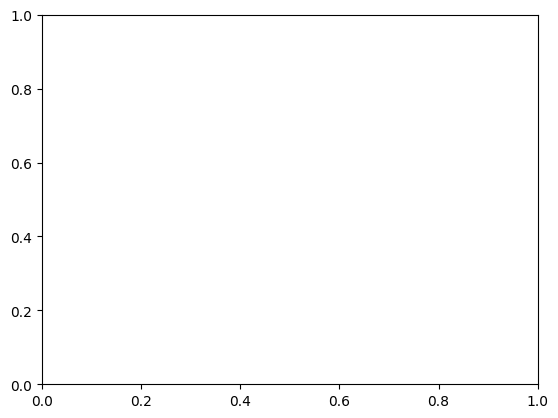

In [119]:
plt.plot(f, 10 * np.log10(Sxx.mean(0).real), lw=3, label='Trial-averaged spectrum')  
# ... and the spectrum from the first trial for reference
plt.plot(f, 10 * np.log10(Sxx[0].real), 'k', label='Single-trial spectrum')  

plt.xlim([0, 100])                                # ... in select frequency range,
plt.ylim([-50, 0])                                # ... in select power range,
plt.xlabel('Frequency [Hz]')                      # ... with axes labelled.
plt.ylabel('Power [ mV^2/Hz]')
plt.title('Trial-averaged spectrum')
plt.legend()
plt.show()

Consider the dataset ECoG-2.mat available in the GitHub repository. Please load these data into Python. Upon doing so, you will find three variables in your workspace. The variables x and y correspond to two simultaneous recordings of ECoG activity from two electrodes. Both variables are organized so that the rows correspond to trials, and the columns to time. You should find 100 trials, with 1000 time points per trial. The variable t corresponds to the time axis for these data, in units of seconds. Please use these data to answer the following questions.

In [130]:
from scipy.io import loadmat

In [138]:
ecog2data = loadmat('ECOG-2.mat')    # Load the EEG data

In [ ]:
whos

In [139]:
ecog2data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y', 't'])

Visualize data from each electrode.

In [157]:
#x is electrode 1
#y is electrode 2 
E1 = ecog2data['x']
E2 = ecog2data['y']
t  = data['t'][0]
dt = t[1] - t[0]                             # ... to get the sampling interval,
T = t[-1]                                    # ... and the total time of the recording.
N = E1.shape[1]                              # Determine the number of sample points per trial
scale = 2 * dt**2 / T   

In [143]:
print('Shape of E1', np.shape(E1)) #(1000 rows, 500 columns)
print('Shape of E1', np.shape(E2)) #(1000, 500)
print('Shape of t', np.shape(t)) #(500,)

Shape of E1 (100, 1000)
Shape of E1 (100, 1000)
Shape of t (1000,)


In [161]:
# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in E1]) # ... for each trial in E1
yf = np.array([np.fft.rfft(y - y.mean()) for y in E2]) # ... and each trial in E2

In [162]:
#compute the spectra
Sxx = scale * (xf * xf.conj()).mean(0)       # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)       # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)     

In [164]:
# Compute the coherence.
cohr = abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

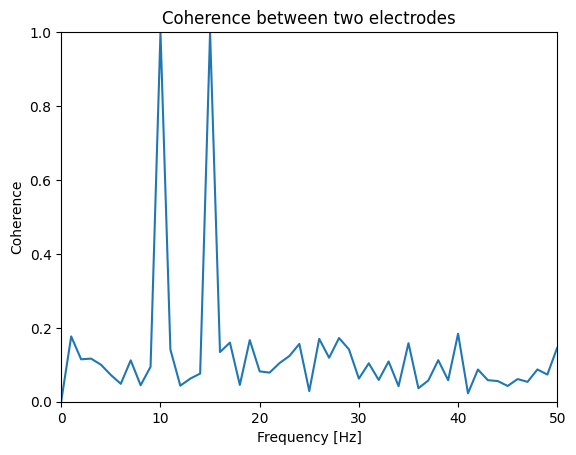

In [168]:
f = np.fft.rfftfreq(N, dt)                          # Define a frequency axis.
plt.plot(f, cohr.real)                           # Plot coherence vs frequency,
plt.xlim([0, 50])                                # ... in a chosen frequency range,
plt.ylim([0, 1])                                 # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                     # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')
plt.show()

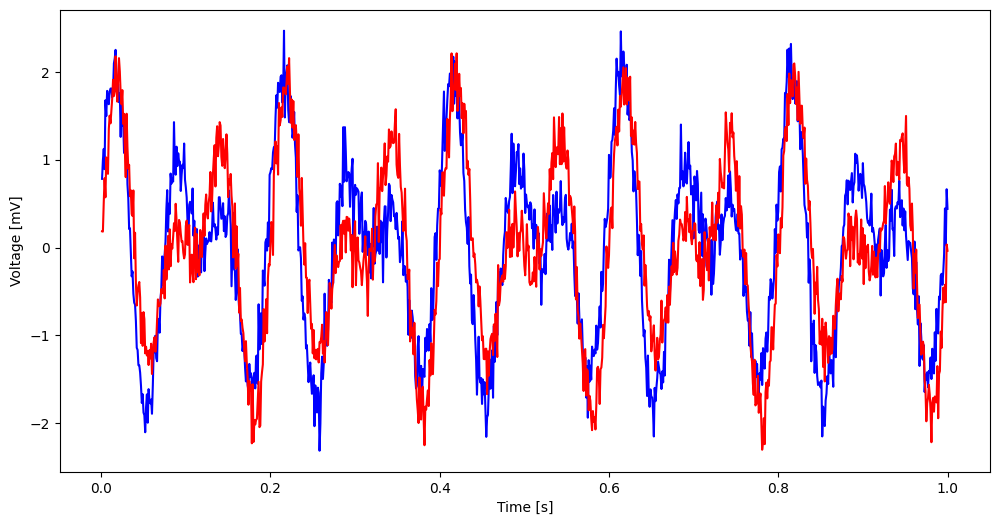

In [173]:
f, a = plt. subplots(figsize=(12, 6))
plt.plot(t,E1[0,:], 'b')            # Plot the data from the first trial of one electrode,
plt.plot(t,E2[0,:], 'r')            # ... and the first trial of the other electrode.
plt.xlabel('Time [s]');
plt.ylabel('Voltage [mV]');
plt.fig, ax = {'traces': f}, {'traces': a}

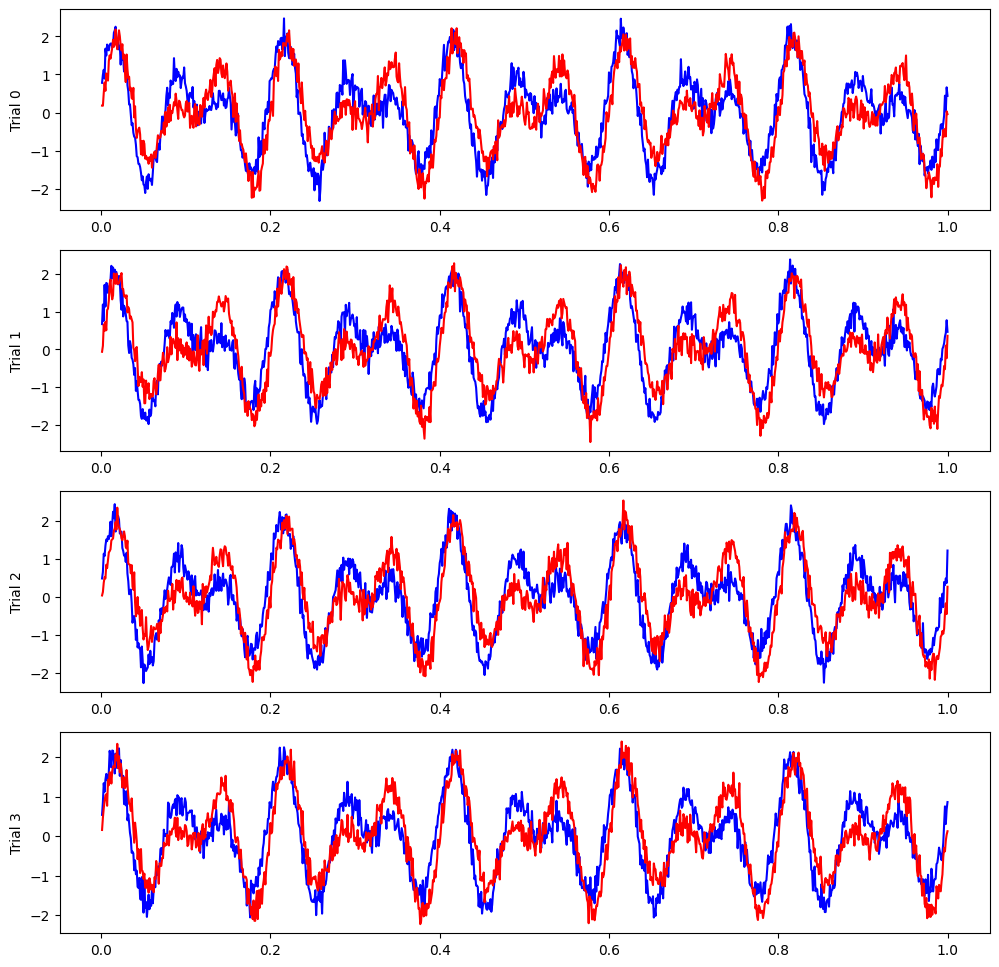

In [180]:
f, a = plt.subplots(4, 1, figsize=(12, 3*4))
for j in range(4):
    a[j].plot(t, E1[j], 'b')            # Plot the data from trial j of one electrode,
    a[j].plot(t, E2[j], 'r')            # ... and trial j of the other electrode.
    a[j].set_ylabel('Trial ' + str(j))

$\textbf{3 ii.}$ Plot the trial-averaged spectrum versus frequency for both electrodes. Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

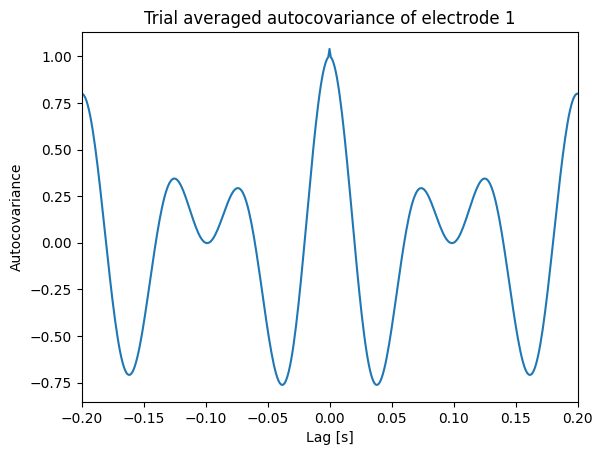

In [186]:
dt = t[1] - t[0]              # Define the sampling interval.
K = E1.shape[0]               # Define the number of trials.
N = E1.shape[1]               # Define number of points in each trial.
ac = np.zeros([2 * N - 1])       # Declare empty vector for autocov.

for trial in E1:              # For each trial,
    x = trial - trial.mean()  # ... subtract the mean,
    ac0 = 1 / N * np.correlate(x, x, 'full')  # ... compute autocovar,
    ac += ac0 / K;            # ... and add to total, scaled by 1/K.

lags = np.arange(-N + 1, N)      # Create a lag axis,

plt.plot(lags * dt, ac)           # ... and plot the result.
plt.xlim([-0.2, 0.2])
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');
plt.title('Trial averaged autocovariance of electrode 1')
plt.show()

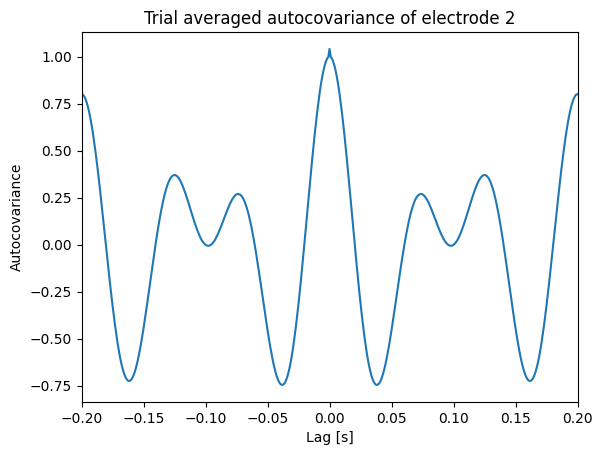

In [188]:
dt = t[1] - t[0]              # Define the sampling interval.
K = E2.shape[0]               # Define the number of trials.
N = E2.shape[1]               # Define number of points in each trial.
ac = np.zeros([2 * N - 1])       # Declare empty vector for autocov.

for trial in E2:              # For each trial,
    x = trial - trial.mean()  # ... subtract the mean,
    ac0 = 1 / N * np.correlate(x, x, 'full')  # ... compute autocovar,
    ac += ac0 / K;            # ... and add to total, scaled by 1/K.

lags = np.arange(-N + 1, N)      # Create a lag axis,

plt.plot(lags * dt, ac)           # ... and plot the result.
plt.xlim([-0.2, 0.2])
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');
plt.title('Trial averaged autocovariance of electrode 2')
plt.show()

Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

$\textbf{3 iii.}$ Plot the trial-averaged cross correlation between the two datasets. What features do you observe?

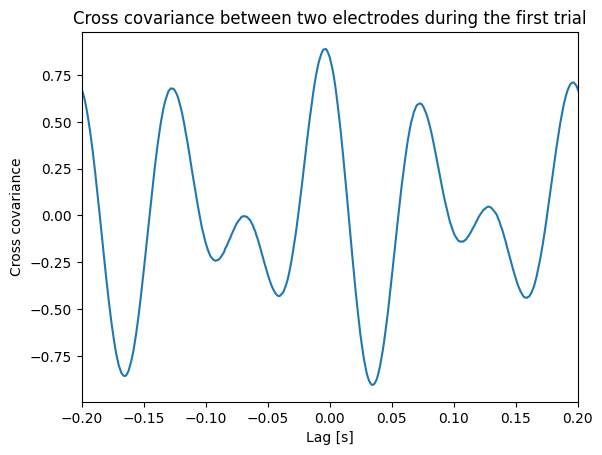

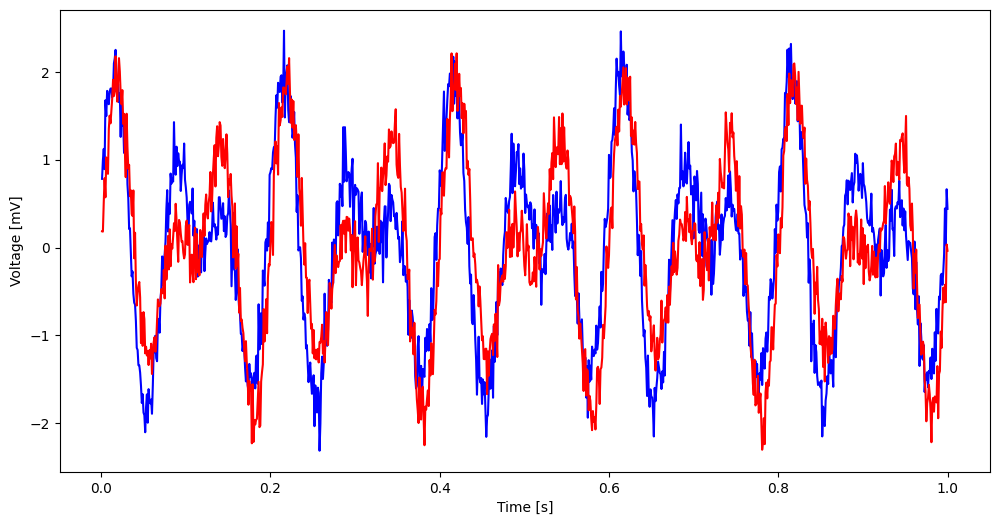

In [192]:
x = E1[0,:] - np.mean(E1[0,:])  # Define one time series,
y = E2[0,:] - np.mean(E2[0,:])  # ... and another.
xc=1/N*np.correlate(x,y,2)      # ... and compute their cross covariance.
lags = np.arange(-N+1,N)        # Create a lag axis,
plt.plot(lags*dt,xc)             # ... and plot the cross covariance vs lags in time.

plt.xlim([-0.2, 0.2])            # In a nice range, with axes labelled.
plt.xlabel('Lag [s]')
plt.ylabel('Cross covariance');
plt.title('Cross covariance between two electrodes during the first trial')
plt.show()
plt.fig['traces']

$\textbf{3 iv.}$ Plot the coherence between the two datasets. At what rhythms, if any, is the coherence large?


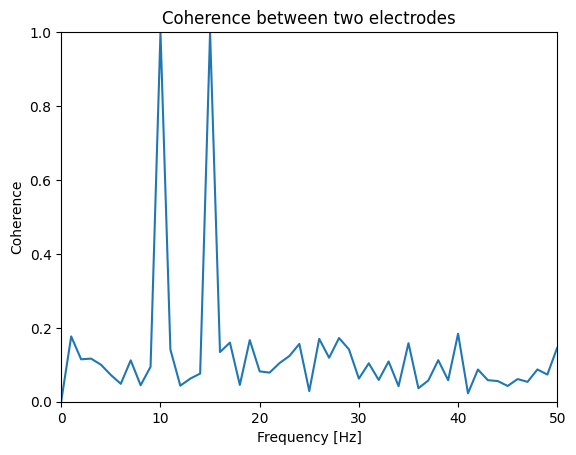

In [200]:
# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in E1])  # ... for each trial in E1
yf = np.array([np.fft.rfft(y - y.mean()) for y in E2])  # ... and each trial in E2

# Compute the spectra
Sxx = scale * (xf * xf.conj()).mean(0)  # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)  # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr = abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.

plt.plot(f, cohr.real)                      # Plot coherence vs frequency,
plt.xlim([0, 50])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')
plt.show()

At why rhythms is the coherence larger?

$\textbf{3 v.}$ Summarize (in a few sentences) the results of your data analysis. What are the important features of these data you would communicate to a colleague?

eh

$\textbf{4 i.}$ Consider the dataset ECoG-3.mat available in the GitHub repository... Visualize the data from each electrode. What rhythms do you observe?

In [201]:
ecog3data = loadmat('ECOG-3.mat')  

In [202]:
#x is electrode 1
#y is electrode 2 
E31 = ecog3data['x']
E32 = ecog3data['y']
t  = data['t'][0]
dt = t[1] - t[0]                             # ... to get the sampling interval,
T = t[-1]                                    # ... and the total time of the recording.
N = E31.shape[1]                              # Determine the number of sample points per trial
scale = 2 * dt**2 / T   

In [203]:
print('Shape of E1', np.shape(E31)) #(1000 rows, 500 columns)
print('Shape of E1', np.shape(E32)) #(1000, 500)
print('Shape of t', np.shape(t)) #(500,)

Shape of E1 (100, 1000)
Shape of E1 (100, 1000)
Shape of t (1000,)


In [204]:
# Compute the Fourier transforms
xf3 = np.array([np.fft.rfft(x - x.mean()) for x in E31]) # ... for each trial in E1
yf3 = np.array([np.fft.rfft(y - y.mean()) for y in E32]) 

In [206]:
#compute the spectra
Sxx3 = scale * (xf3 * xf3.conj()).mean(0)       # Spectrum of E1 trials
Syy3 = scale * (yf3 * yf3.conj()).mean(0)       # ... and E2 trials
Sxy3 = scale * (xf3 * yf3.conj()).mean(0)    

In [207]:
# Compute the coherence.
cohr3 = abs(Sxy3) / (np.sqrt(Sxx3) * np.sqrt(Syy3))

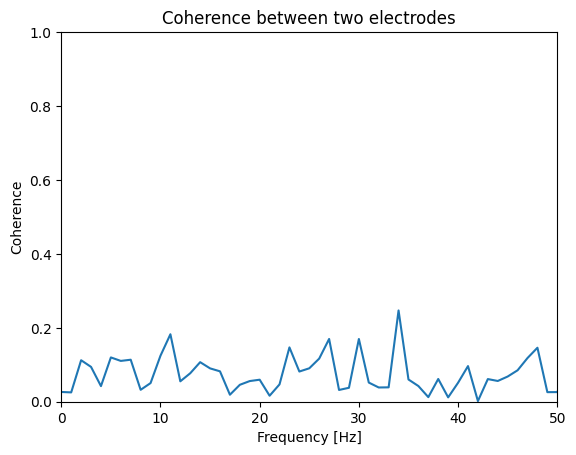

In [208]:
f3 = np.fft.rfftfreq(N, dt)                          # Define a frequency axis.
plt.plot(f3, cohr3.real)                           # Plot coherence vs frequency,
plt.xlim([0, 50])                                # ... in a chosen frequency range,
plt.ylim([0, 1])                                 # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                     # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')
plt.show()

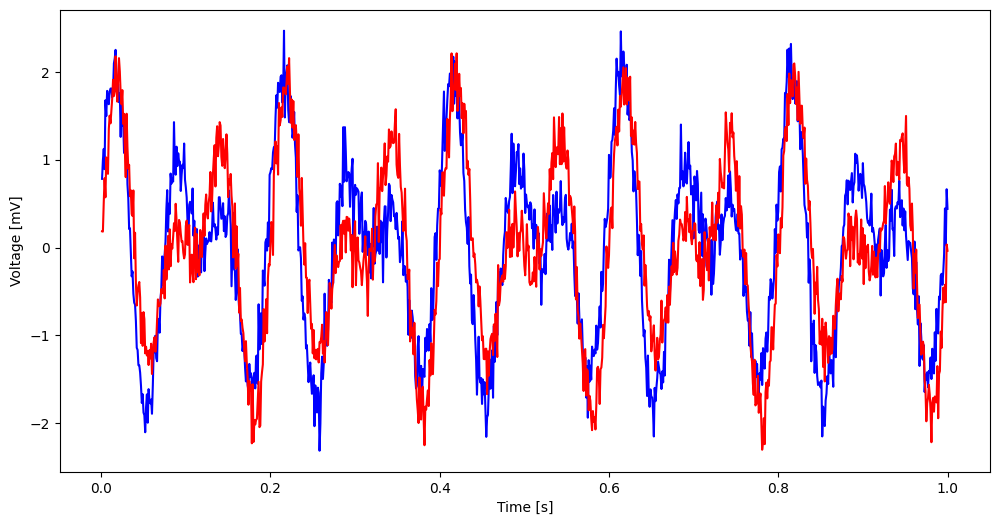

In [210]:
f3, a3 = plt. subplots(figsize=(12, 6))
plt.plot(t,E1[0,:], 'b')            # Plot the data from the first trial of one electrode,
plt.plot(t,E2[0,:], 'r')            # ... and the first trial of the other electrode.
plt.xlabel('Time [s]');
plt.ylabel('Voltage [mV]');
plt.fig, ax = {'traces': f3}, {'traces': a3}

$\textbf{4 ii.}$ Plot the trial-averaged spectrum versus frequency for both electrodes. Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

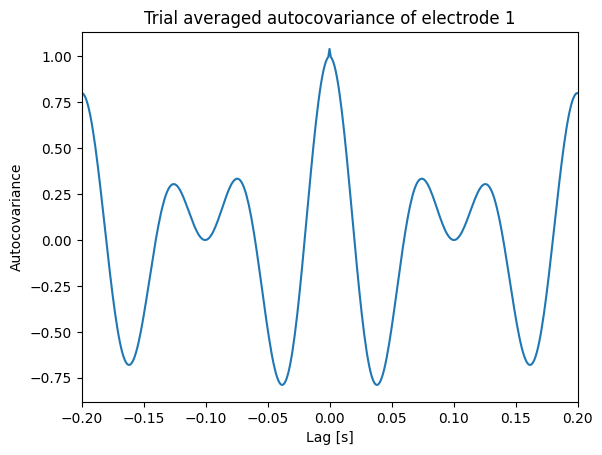

In [217]:
dt3 = t[1] - t[0]              # Define the sampling interval.
K3 = E31.shape[0]               # Define the number of trials.
N3 = E31.shape[1]               # Define number of points in each trial.
ac3 = np.zeros([2 * N3 - 1])       # Declare empty vector for autocov.

for trial in E31:              # For each trial,
    x = trial - trial.mean()  # ... subtract the mean,
    ac30 = 1 / N3 * np.correlate(x, x, 'full')  # ... compute autocovar,
    ac3 += ac30 / K3;            # ... and add to total, scaled by 1/K.

lags3 = np.arange(-N3 + 1, N3)      # Create a lag axis,

plt.plot(lags3 * dt3, ac3)           # ... and plot the result.
plt.xlim([-0.2, 0.2])
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');
plt.title('Trial averaged autocovariance of electrode 1')
plt.show()

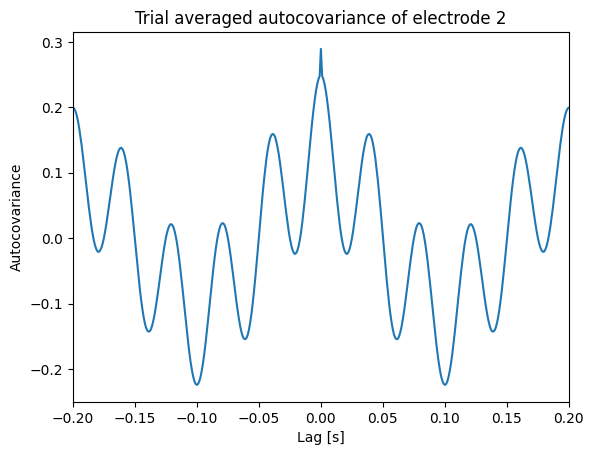

In [216]:
dt32 = t[1] - t[0]              # Define the sampling interval.
K32 = E2.shape[0]               # Define the number of trials.
N32 = E2.shape[1]               # Define number of points in each trial.
ac32 = np.zeros([2 * N - 1])       # Declare empty vector for autocov.

for trial in E32:              # For each trial,
    x = trial - trial.mean()  # ... subtract the mean,
    ac320 = 1 / N32 * np.correlate(x, x, 'full')  # ... compute autocovar,
    ac32 += ac320 / K32;            # ... and add to total, scaled by 1/K.

lags32 = np.arange(-N32 + 1, N32)      # Create a lag axis,

plt.plot(lags32 * dt32, ac32)           # ... and plot the result.
plt.xlim([-0.2, 0.2])
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');
plt.title('Trial averaged autocovariance of electrode 2')
plt.show()

Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

$\textbf{4 iii.}$ Plot the trial-averaged cross correlation between the two datasets. What features do you observe?

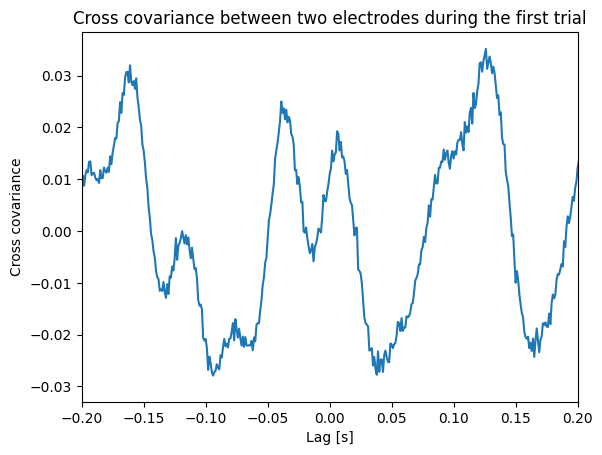

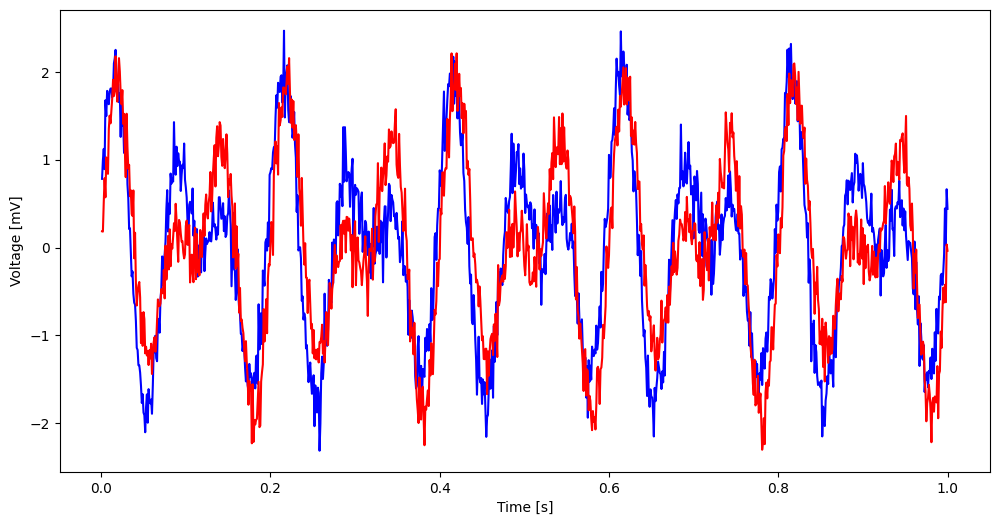

In [221]:
x3 = E31[0,:] - np.mean(E31[0,:])  # Define one time series,
y3 = E32[0,:] - np.mean(E32[0,:])  # ... and another.
xc3=1/N*np.correlate(x3,y3,2)      # ... and compute their cross covariance.
lags = np.arange(-N3+1,N3)        # Create a lag axis,
plt.plot(lags*dt3,xc3)             # ... and plot the cross covariance vs lags in time.

plt.xlim([-0.2, 0.2])            # In a nice range, with axes labelled.
plt.xlabel('Lag [s]')
plt.ylabel('Cross covariance');
plt.title('Cross covariance between two electrodes during the first trial')
plt.show()
plt.fig['traces']

$\textbf{3 iv.}$ Plot the coherence between the two datasets. At what rhythms, if any, is the coherence large?

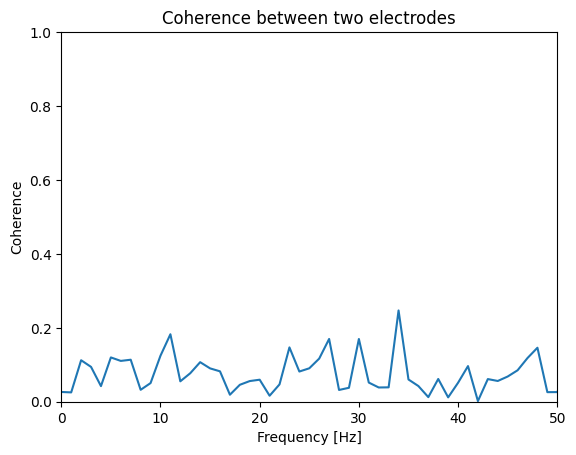

In [230]:
# Compute the Fourier transforms
xf3 = np.array([np.fft.rfft(x3 - x3.mean()) for x3 in E31])  # ... for each trial in E1
yf3 = np.array([np.fft.rfft(y3 - y3.mean()) for y3 in E32])  # ... and each trial in E2

# Compute the spectra
Sxx3 = scale * (xf3 * xf3.conj()).mean(0)  # Spectrum of E1 trials
Syy3 = scale * (yf3 * yf3.conj()).mean(0)  # ... and E2 trials
Sxy3 = scale * (xf3 * yf3.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr32 = abs(Sxy3) / (np.sqrt(Sxx3) * np.sqrt(Syy3))

f32 = np.fft.rfftfreq(N3, dt3)                     # Define a frequency axis.

plt.plot(f32, cohr32.real)                      # Plot coherence vs frequency,
plt.xlim([0, 50])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')
plt.show()

$\textbf{4 v.}$ Summarize (in a few sentences) the results of your data analysis. What are the important features of these data you would communicate to a colleague?

eh